##  DS701 Discussion - Natural Language Processing

### Numerical Representation of Words

- Text data needs to be converted to numbers for computers to process it. 
- We'll take a look at Bag of Words, TFIDF and Word2Vec representations of text. These representations are also called as `Embeddings`.
- Embeddings capture `semantic relationships` between words in a dense vector space.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Sample text documents
documents = [
    'Natural language processing is fascinating',
    'I love working with text data',
    'Processing text requires preprocessing',
    'Natural language models are powerful'
]

In [15]:
# Bag of Words
print("Bag of Words Representation:")
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(documents)
bow_df = pd.DataFrame(
    bow_matrix.toarray(), 
    columns=bow_vectorizer.get_feature_names_out()
)
print(bow_df)

Bag of Words Representation:
   are  data  fascinating  is  language  love  models  natural  powerful  \
0    0     0            1   1         1     0       0        1         0   
1    0     1            0   0         0     1       0        0         0   
2    0     0            0   0         0     0       0        0         0   
3    1     0            0   0         1     0       1        1         1   

   preprocessing  processing  requires  text  with  working  
0              0           1         0     0     0        0  
1              0           0         0     1     1        1  
2              1           1         1     1     0        0  
3              0           0         0     0     0        0  


In [24]:
# TF-IDF
print("\nTF-IDF Representation:")
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(), 
    columns=tfidf_vectorizer.get_feature_names_out()
)
print(tfidf_df)


TF-IDF Representation:
        are      data  fascinating        is  language      love    models  \
0  0.000000  0.000000     0.508672  0.508672  0.401043  0.000000  0.000000   
1  0.000000  0.465162     0.000000  0.000000  0.000000  0.465162  0.000000   
2  0.000000  0.000000     0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.485461  0.000000     0.000000  0.000000  0.382743  0.000000  0.485461   

    natural  powerful  preprocessing  processing  requires      text  \
0  0.401043  0.000000       0.000000    0.401043  0.000000  0.000000   
1  0.000000  0.000000       0.000000    0.000000  0.000000  0.366739   
2  0.000000  0.000000       0.555283    0.437791  0.555283  0.437791   
3  0.382743  0.485461       0.000000    0.000000  0.000000  0.000000   

       with   working  
0  0.000000  0.000000  
1  0.465162  0.465162  
2  0.000000  0.000000  
3  0.000000  0.000000  


In [29]:
# Example of using custom parameters
custom_tfidf = TfidfVectorizer(
    min_df=2,  # Minimum document frequency
    max_df=0.8,  # Maximum document frequency
    stop_words='english'  # Remove English stop words
)
custom_tfidf_matrix = custom_tfidf.fit_transform(documents)
tfidf_df = pd.DataFrame(
    custom_tfidf_matrix.toarray(), 
    columns=custom_tfidf.get_feature_names_out()
)
print(tfidf_df)

   language   natural  processing      text
0  0.577350  0.577350    0.577350  0.000000
1  0.000000  0.000000    0.000000  1.000000
2  0.000000  0.000000    0.707107  0.707107
3  0.707107  0.707107    0.000000  0.000000


In [23]:
from gensim.models import Word2Vec

# Simple example sentences
sentences = [doc.split() for doc in documents]
model = Word2Vec(sentences, min_count=1)

# Get vector for a word
vector = model.wv['Natural']
print(f"Vector representation of 'Natural': {vector}")

Vector representation of 'Natural': [-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.

## N-Gram Models

- `N-gram models` are fundamental in NLP for `predicting sequences of words` by analyzing patterns in text. 
- An `n-gram is a contiguous sequence` of n items (words or characters) from a given text. 
- These models work by `calculating the probability` of a word occurring based on its previous words.

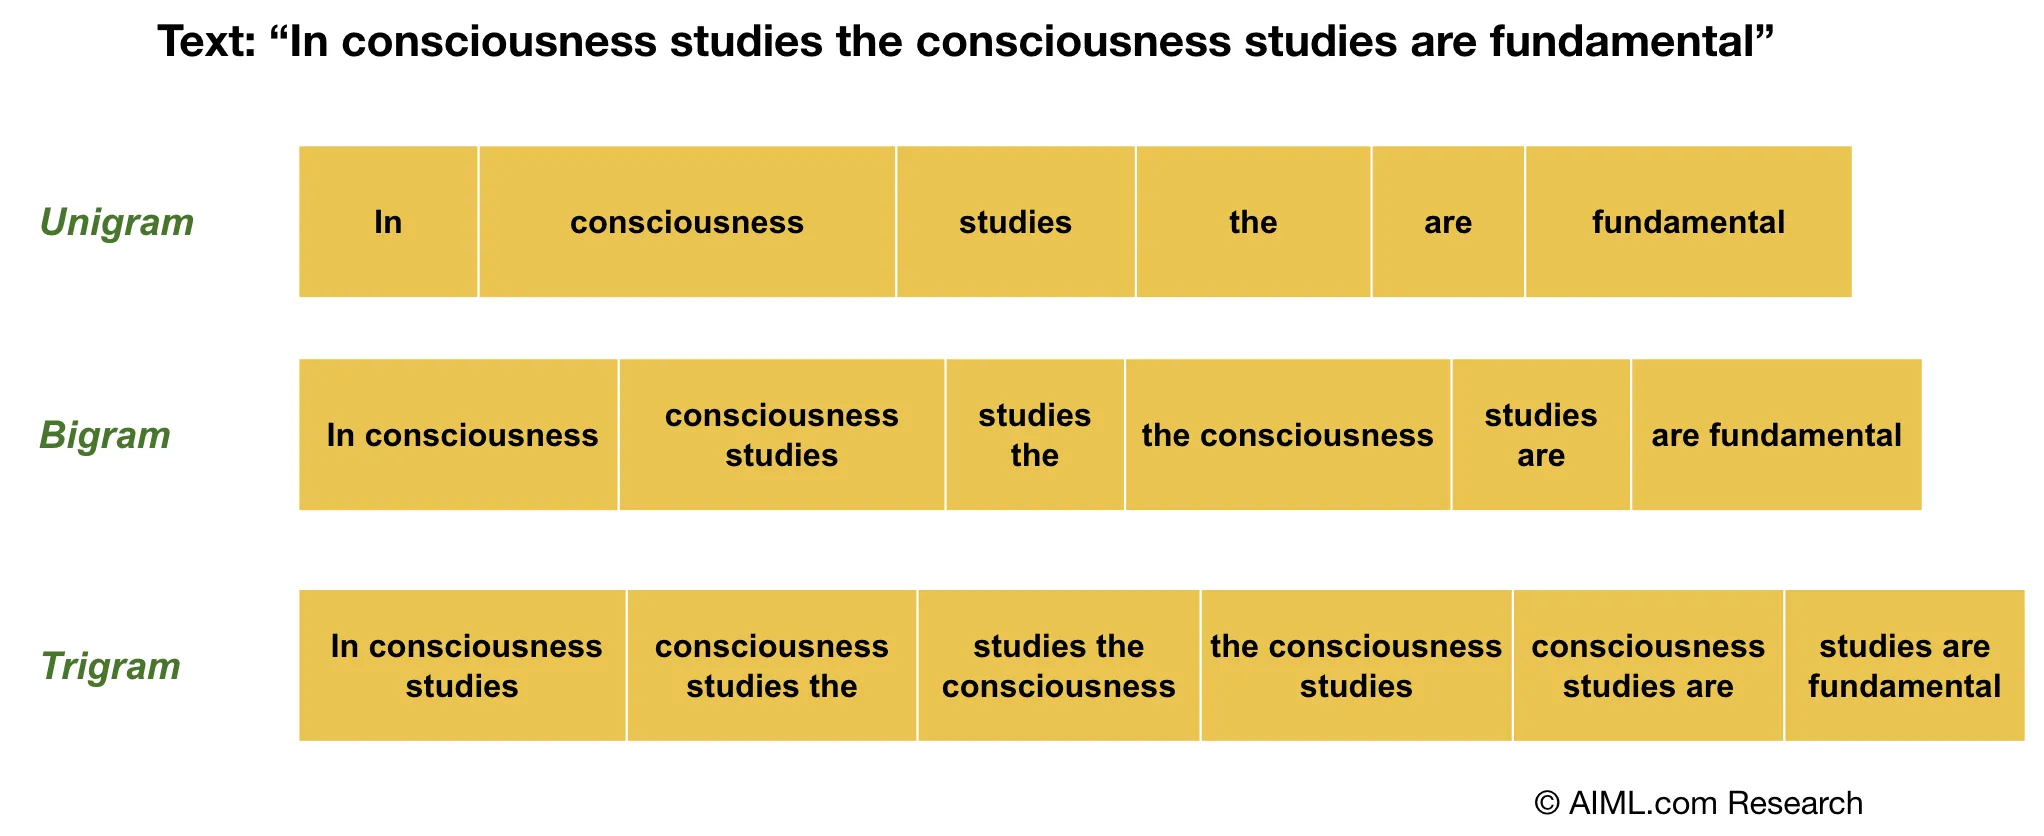

In [ ]:
import nltk
from nltk import ngrams
from collections import Counter
import numpy as np

# Sample text
text = """Natural language processing is an exciting field of study. 
         Language models help computers understand human language. 
         Processing text requires careful analysis."""

# Preprocess the text
tokens = nltk.word_tokenize(text.lower())
print(tokens)

['natural', 'language', 'processing', 'is', 'an', 'exciting', 'field', 'of', 'study', '.', 'language', 'models', 'help', 'computers', 'understand', 'human', 'language', '.', 'processing', 'text', 'requires', 'careful', 'analysis', '.']


In [32]:
# Generate different n-grams
def generate_ngrams(tokens, n):
    # Create n-grams
    n_grams = list(ngrams(tokens, n))
    
    # Count frequencies
    freq_dist = Counter(n_grams)
    
    return freq_dist

# Generate and display bigrams and trigrams
bigrams = generate_ngrams(tokens, 2)
trigrams = generate_ngrams(tokens, 3)

In [ ]:
# Calculate probability of a word given its previous word (for bigrams)
def conditional_probability(word1, word2, bigrams, tokens):
    bigram_count = bigrams.get((word1, word2), 0)
    word1_count = tokens.count(word1)
    
    if word1_count == 0:
        return 0
    return bigram_count / word1_count

print("Most common bigrams:")
print(bigrams.most_common(3))

print("\nProbability example:")
prob = conditional_probability('language', 'processing', bigrams, tokens)
print(f"P(processing|language) = {prob:.2f}")

Most common bigrams:
[(('natural', 'language'), 1), (('language', 'processing'), 1), (('processing', 'is'), 1)]

Probability example:
P(processing|language) = 0.33


In [35]:
print("Most common trigrams:")
print(trigrams.most_common(5))

Most common trigrams:
[(('natural', 'language', 'processing'), 1), (('language', 'processing', 'is'), 1), (('processing', 'is', 'an'), 1), (('is', 'an', 'exciting'), 1), (('an', 'exciting', 'field'), 1)]


## Language Models - Transformers

- `Transformers` are a revolutionary architecture in NLP that has become the foundation for modern language processing tasks.

### Core Components
#### Architecture Overview
- Built on `self-attention mechanisms` that allow the model to `weigh the importance` of `different words in relation` to each other
- Consists of `encoder and decoder` blocks that `process input and generate output` sequences
- Uses `positional encodings` to maintain word order information
#### Key Features
- Processes entire `sequences in parallel`, unlike traditional sequential models
- Captures `long-range dependencies` between words effectively
- Employs `multi-head attention` to learn different types of relationships

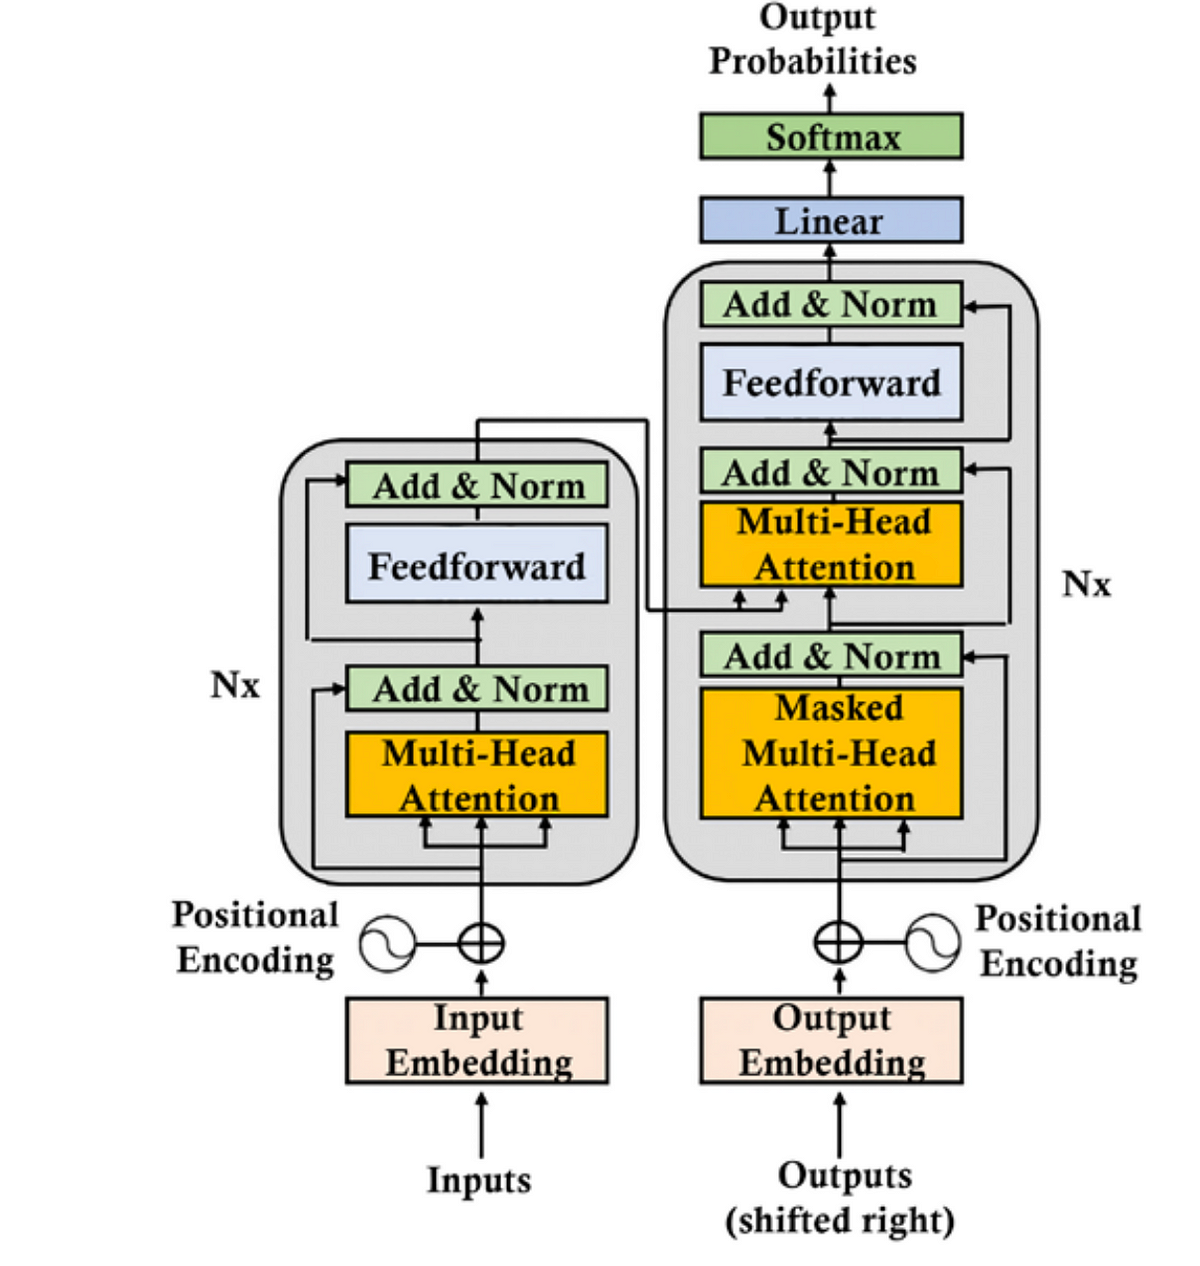

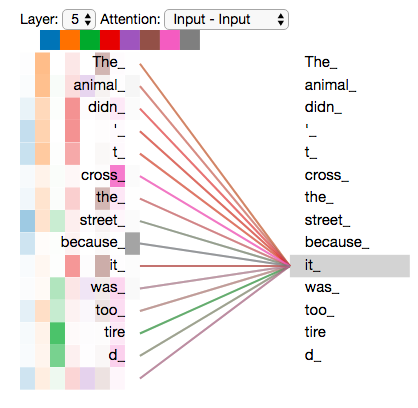

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                         num_labels=2)

texts = [
    "I really enjoyed this movie, it was fantastic!",
    "This was a terrible waste of time."
]

inputs = tokenizer(texts, padding=True, truncation=True, 
                  return_tensors="pt", max_length=512)
print(inputs)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'input_ids': tensor([[  101,  1045,  2428,  5632,  2023,  3185,  1010,  2009,  2001, 10392,
           999,   102],
        [  101,  2023,  2001,  1037,  6659,  5949,  1997,  2051,  1012,   102,
             0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])}


In [48]:

with torch.no_grad():
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)


for text, pred in zip(texts, predictions):
    sentiment = "Positive" if pred[1] > pred[0] else "Negative"
    confidence = max(pred).item()
    print(f"Text: {text}")
    print(f"Sentiment: {sentiment} (confidence: {confidence:.2f})\n")

Text: I really enjoyed this movie, it was fantastic!
Sentiment: Positive (confidence: 0.50)

Text: This was a terrible waste of time.
Sentiment: Negative (confidence: 0.53)

